In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Sg960YsfFxHn3X5zUJTX")
project = rf.workspace("objectdetection-dxeuw").project("face-detection-z1x9s")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [6]:
# Train YOLOv8n on COCO8 for 10 epochs
!yolo task= detect mode= train data=/content/face-detection-1/data.yaml model=yolov10m.pt epochs=10 imgsz=640 batch=16

100% 32.1M/32.1M [00:00<00:00, 329MB/s]
Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/content/face-detection-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

In [7]:
from IPython.display import Image, display

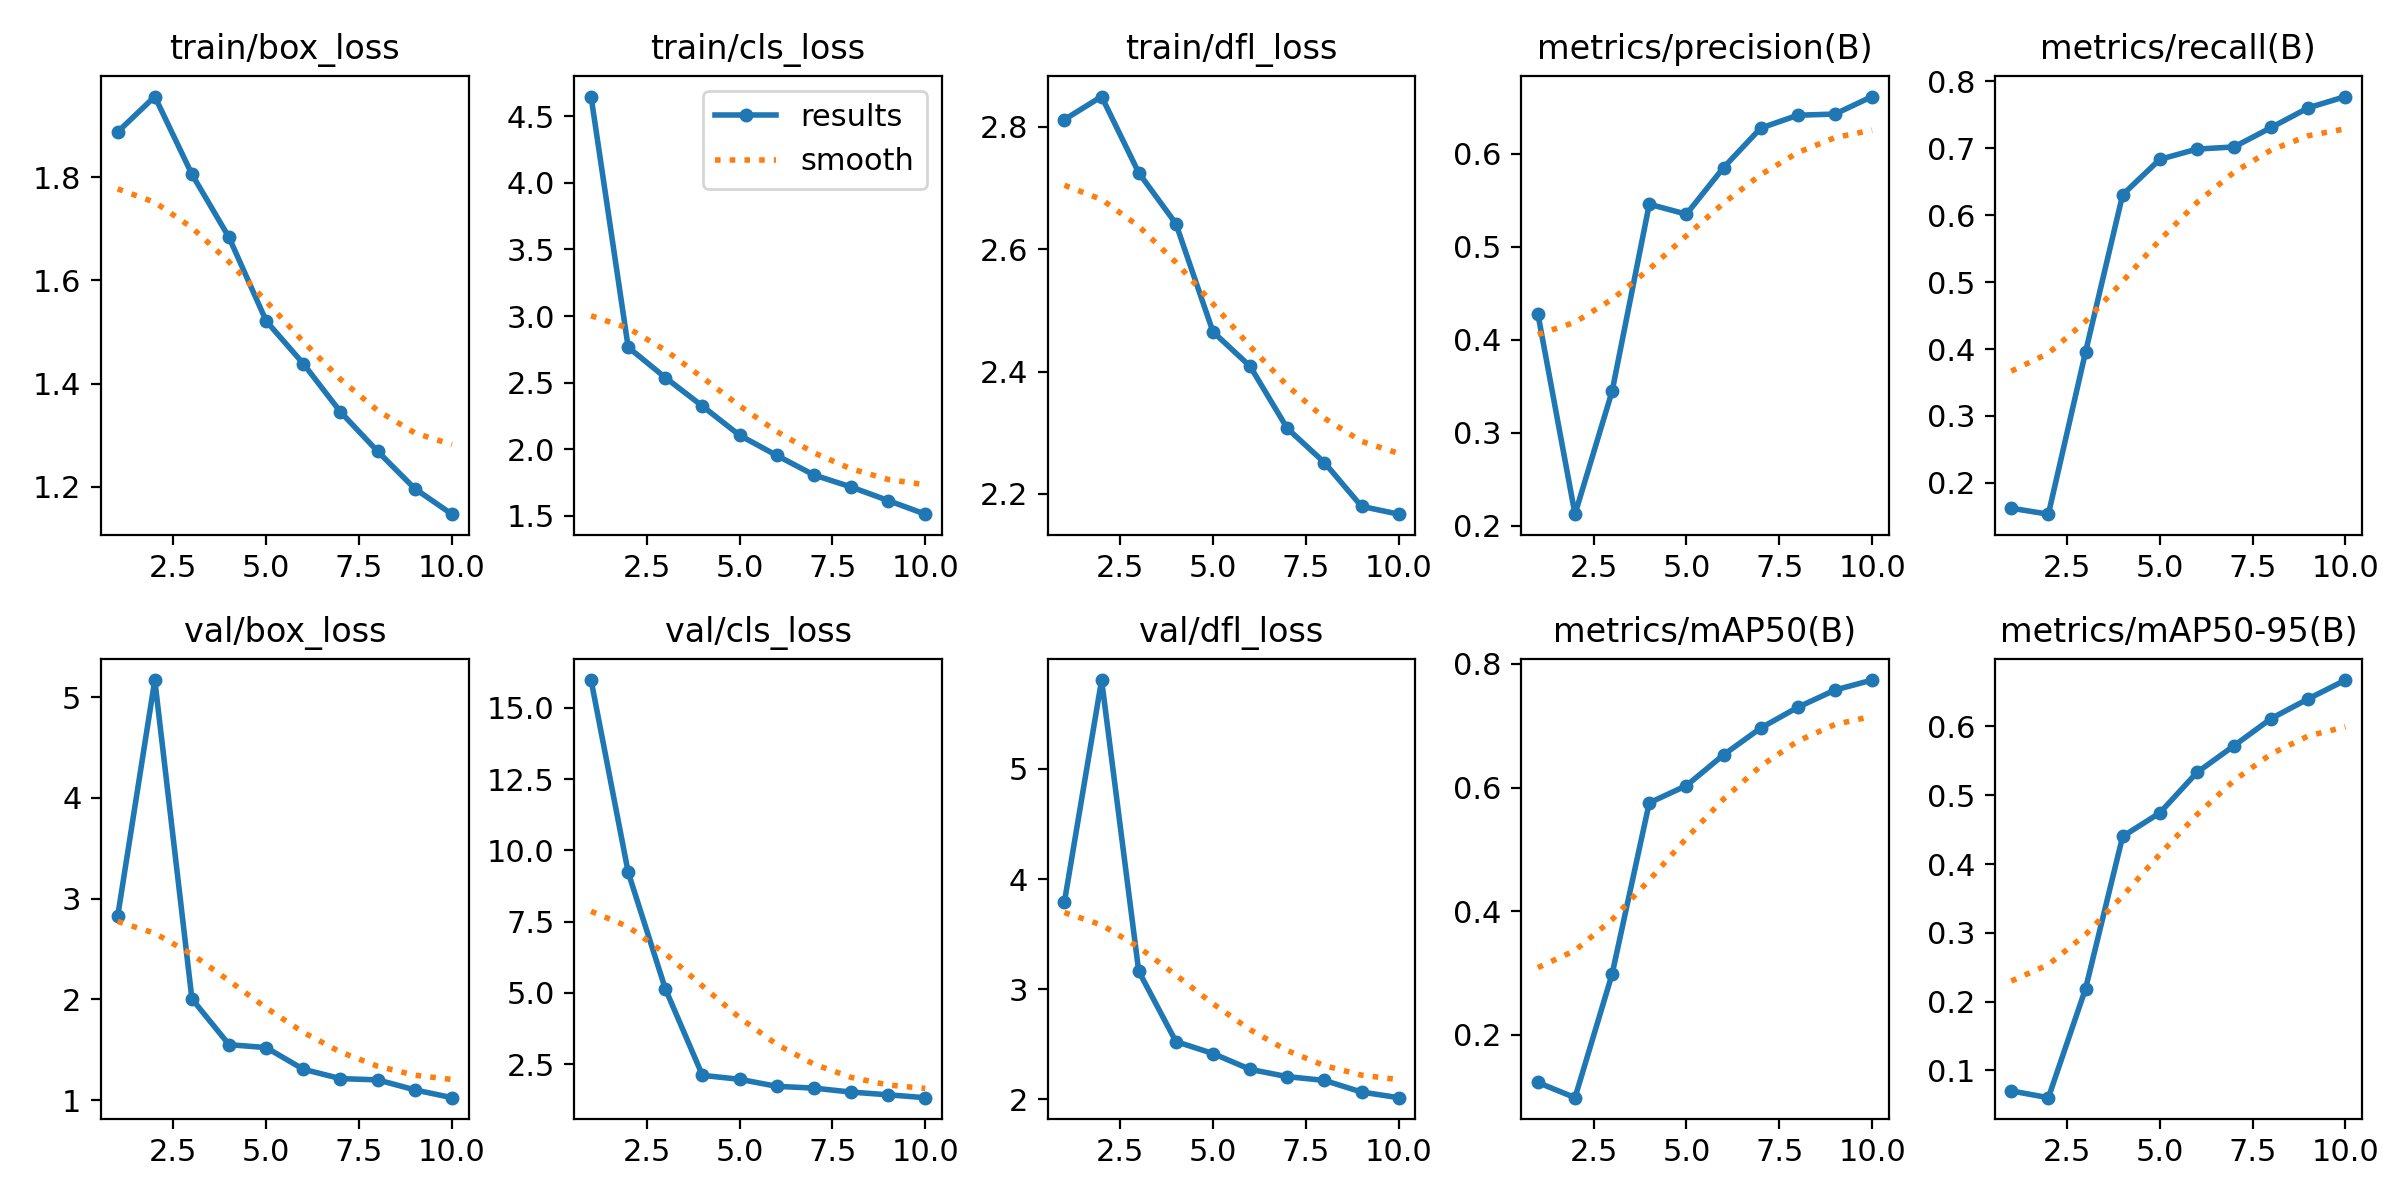

In [8]:
display(Image(filename=f"/content/runs/detect/train/results.png", width=1000))

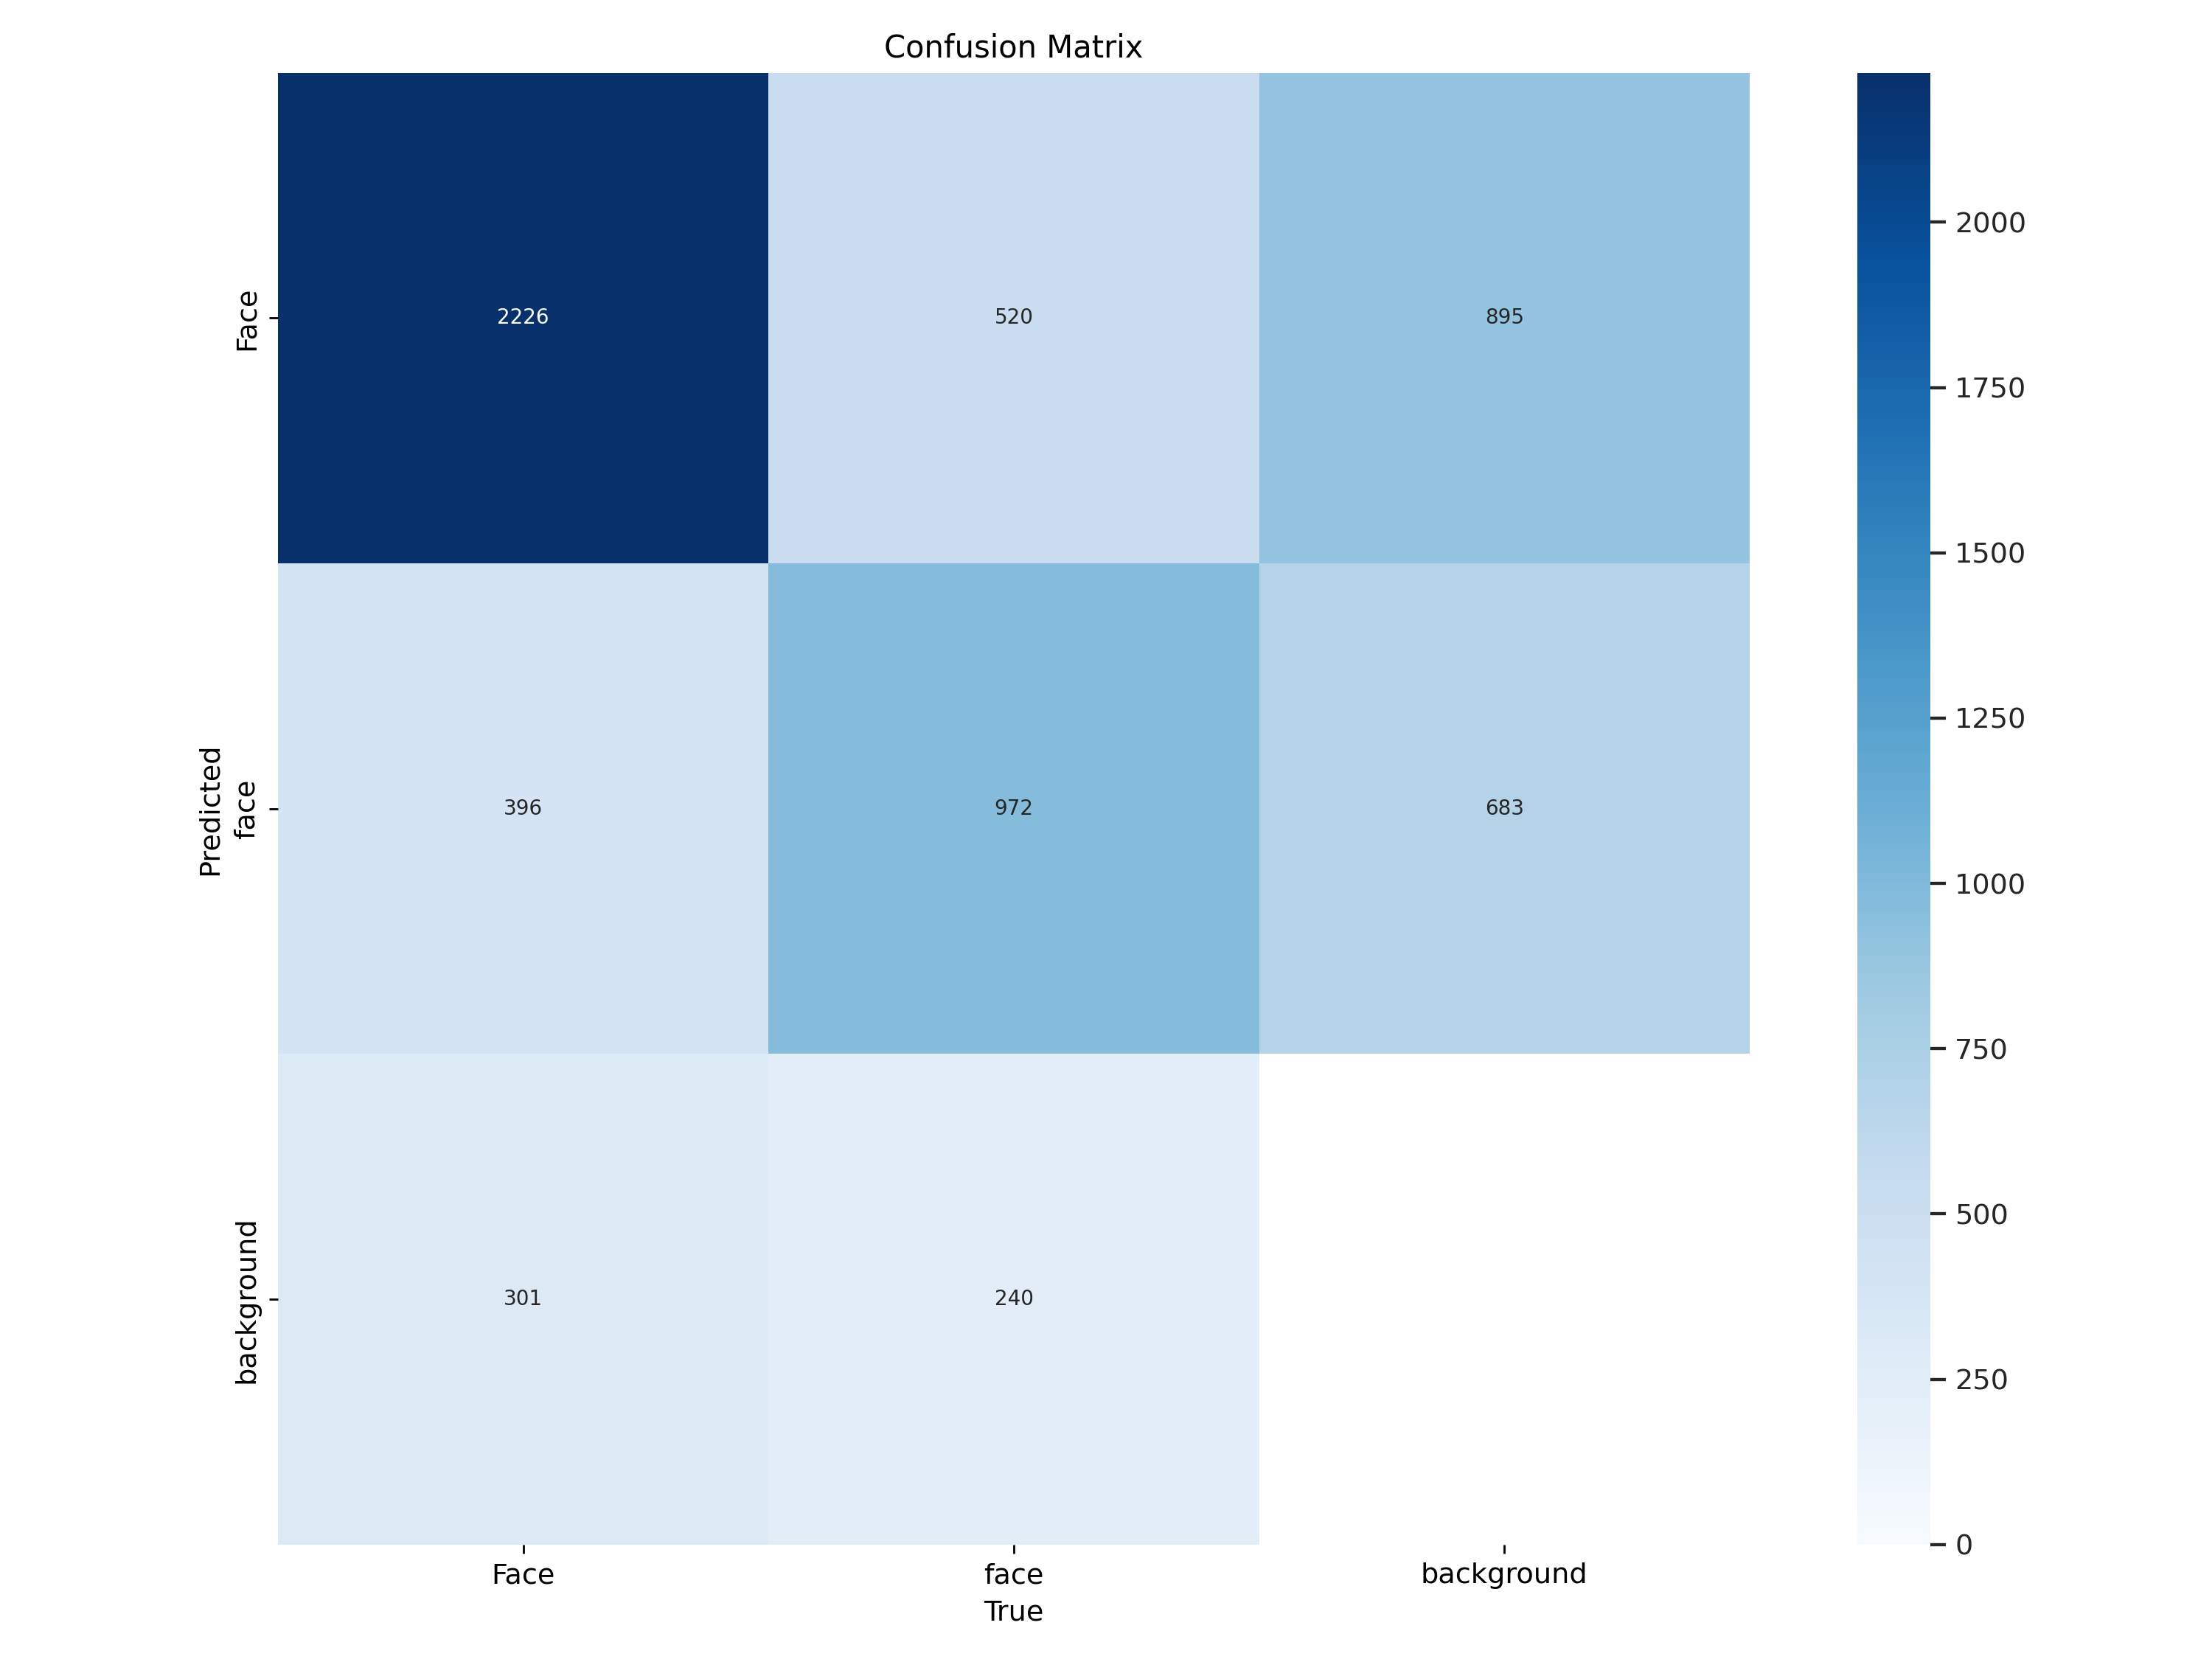

In [10]:
display(Image(filename=f"/content/runs/detect/train/confusion_matrix.png", width=1000))

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=/content/face-detection-1/test/images

Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,452,700 parameters, 0 gradients, 63.4 GFLOPs

image 1/1513 /content/face-detection-1/test/images/0_10725_jpg.rf.2211d1905defbdf8df9fe13f2191bc86.jpg: 640x640 2 Faces, 34.4ms
image 2/1513 /content/face-detection-1/test/images/0_10725_jpg.rf.a2a7ce9d20e47c441ed87e73b35741a4.jpg: 640x640 3 Faces, 34.5ms
image 3/1513 /content/face-detection-1/test/images/101_jpg.rf.13a210b8f1b51dc497bb936285ae72b4.jpg: 640x640 1 Face, 33.4ms
image 4/1513 /content/face-detection-1/test/images/101_jpg.rf.4b93ceef452f206105e769dd650cd6b9.jpg: 640x640 1 Face, 30.6ms
image 5/1513 /content/face-detection-1/test/images/101_jpg.rf.4f1bac551eface241ef0d8b8de2c84b9.jpg: 640x640 1 Face, 30.5ms
image 6/1513 /content/face-detection-1/test/images/101_jpg.rf.cb35b5f23de677941f6acb4b329836ab.jpg: 640x640 1 face, 30.5ms
image 7/1513 /content/face-detection-1/test/images/104_jpg.rf.635ee4af4a13a402cbd95

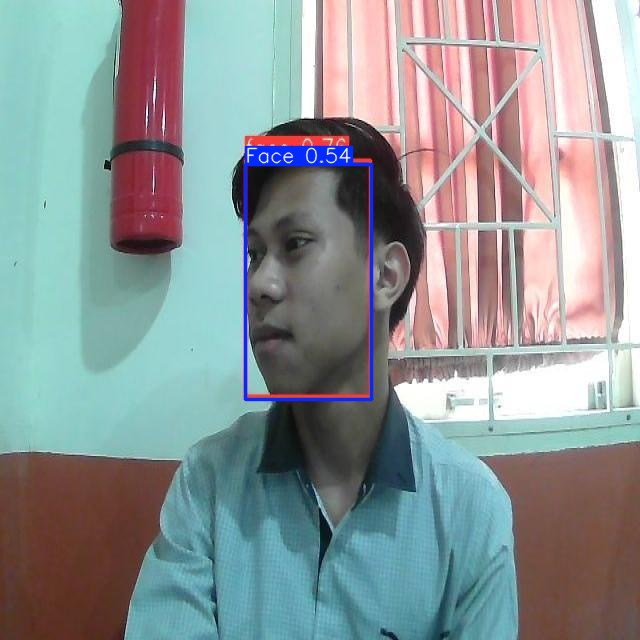

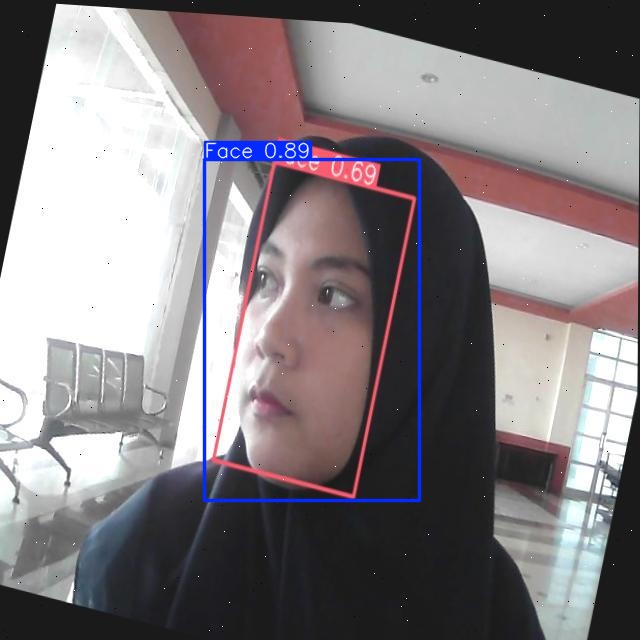

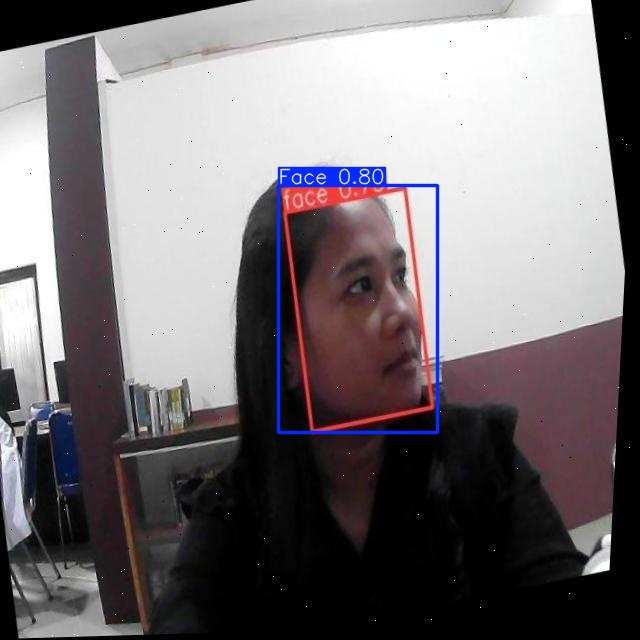

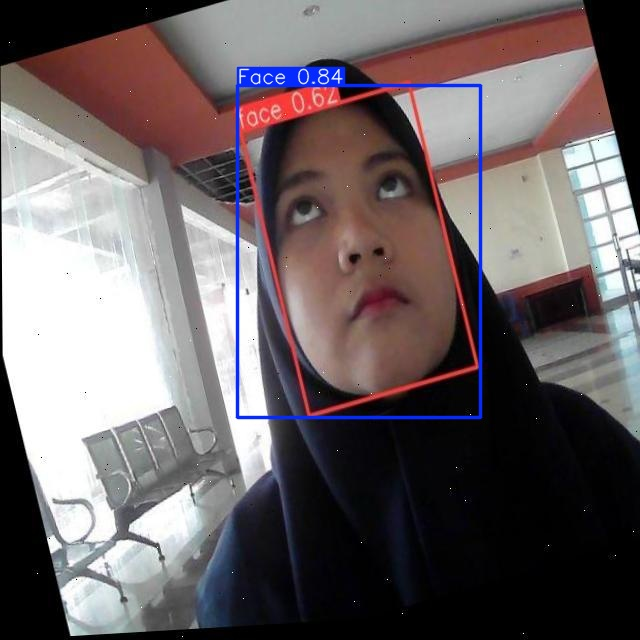

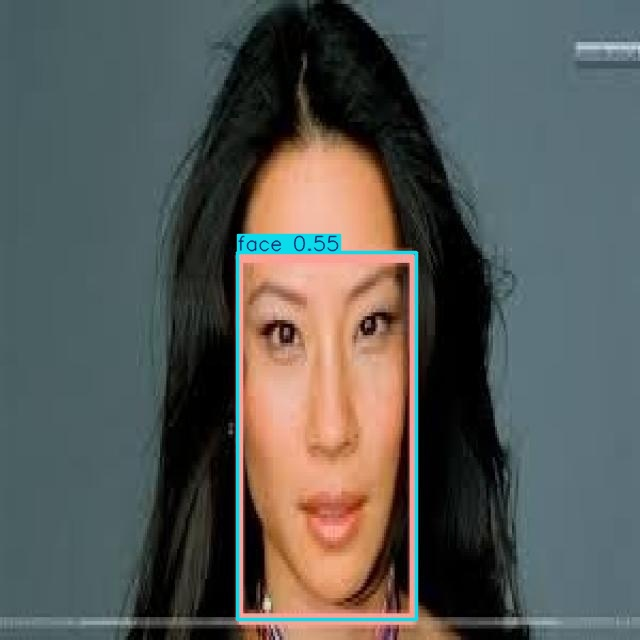

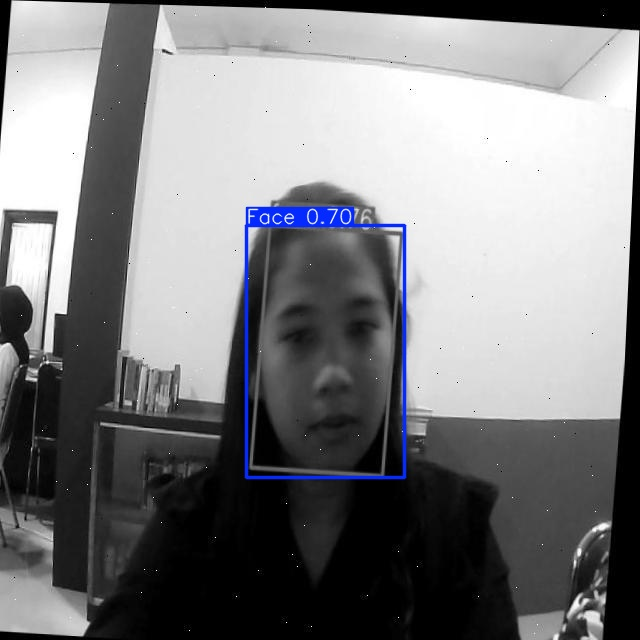

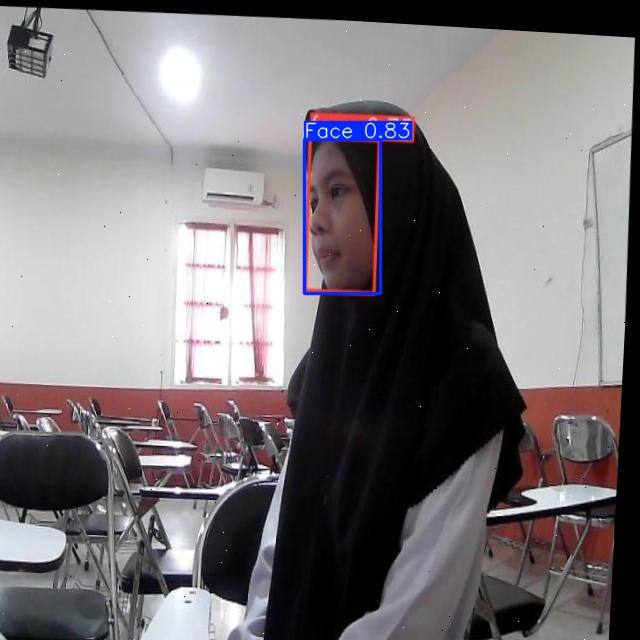

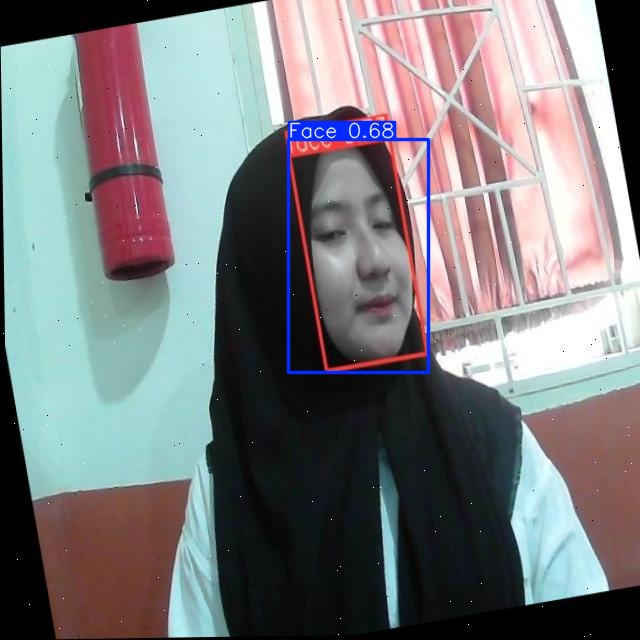

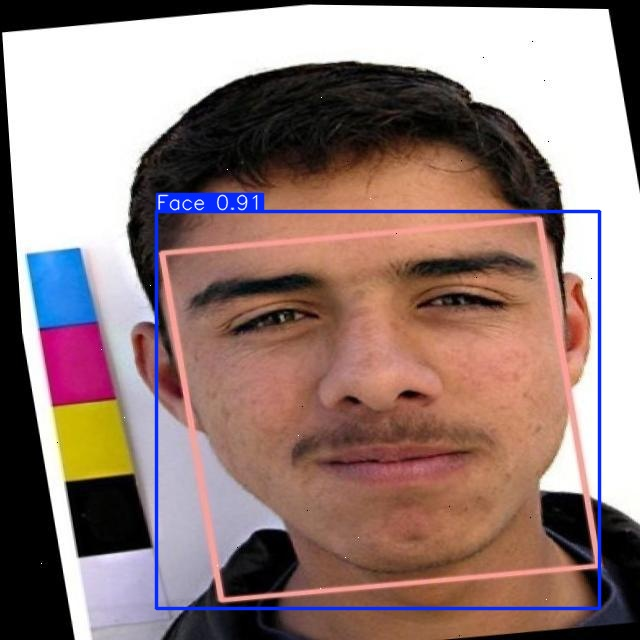

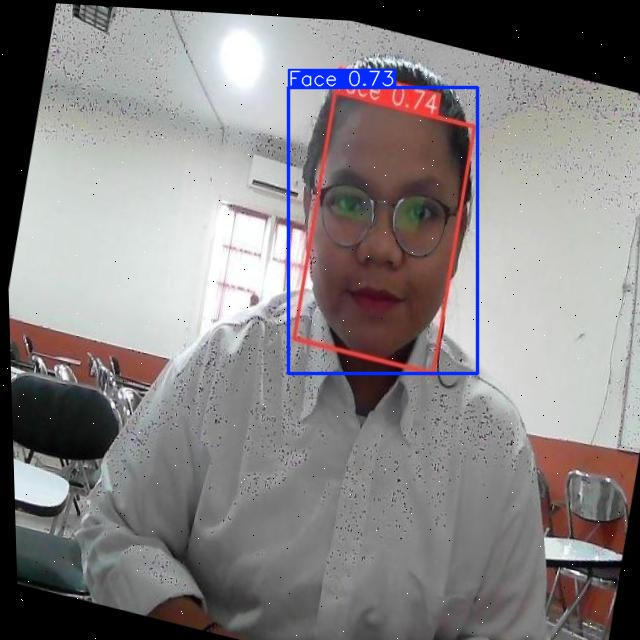

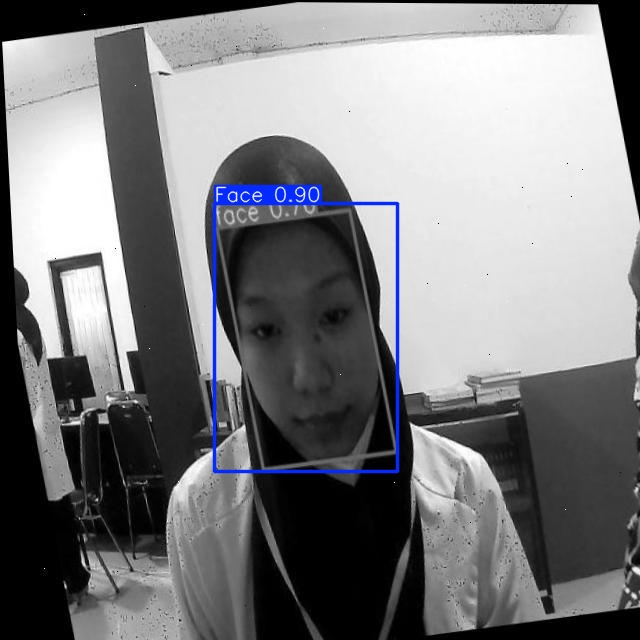

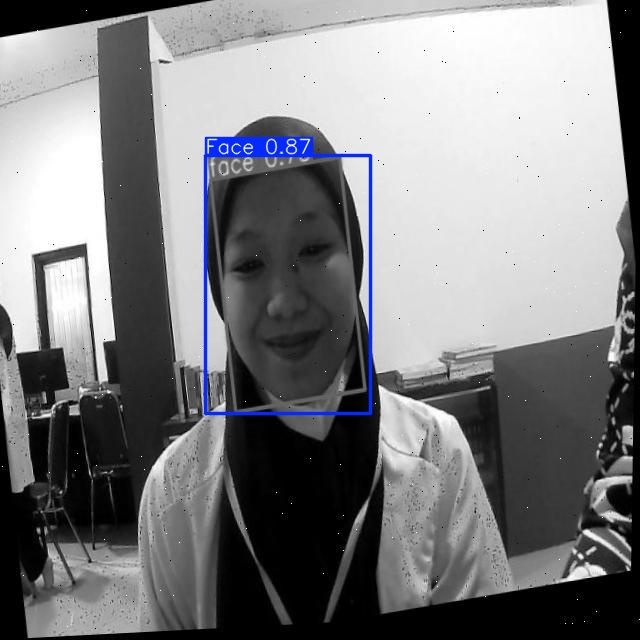

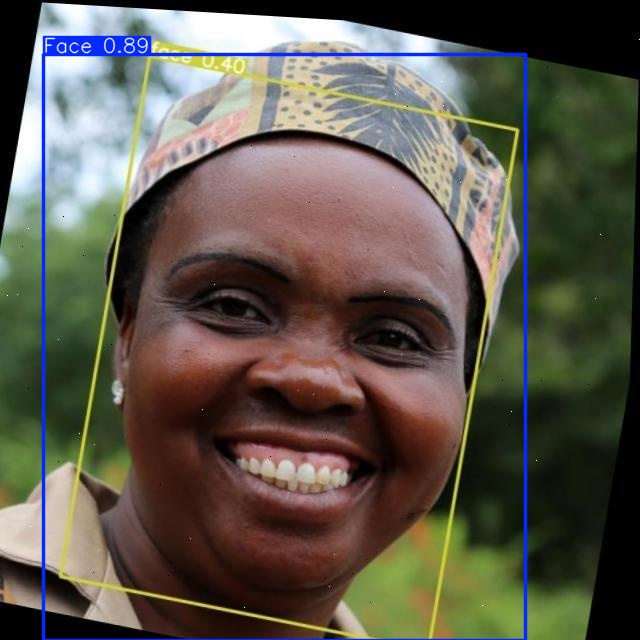

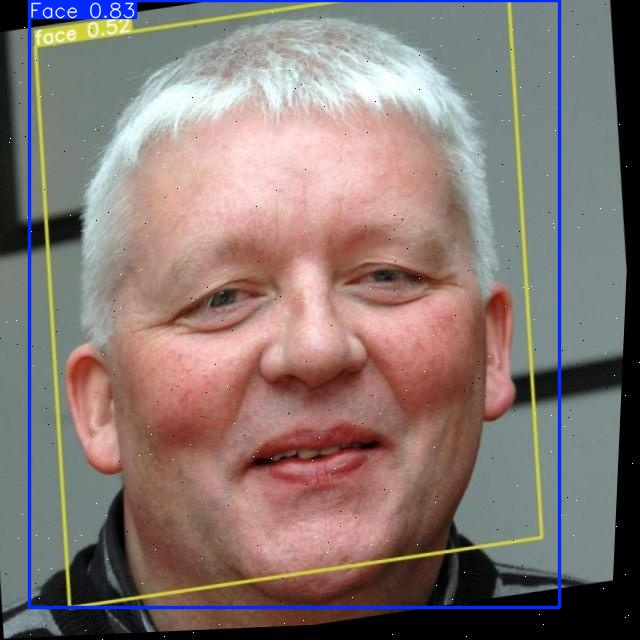

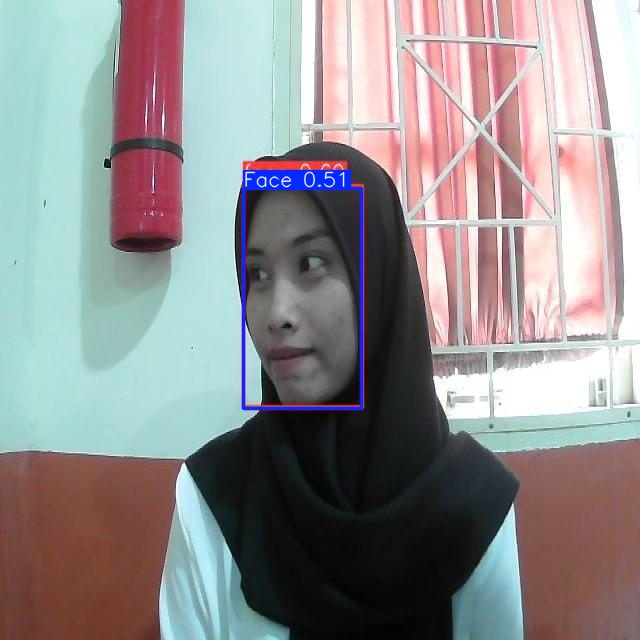

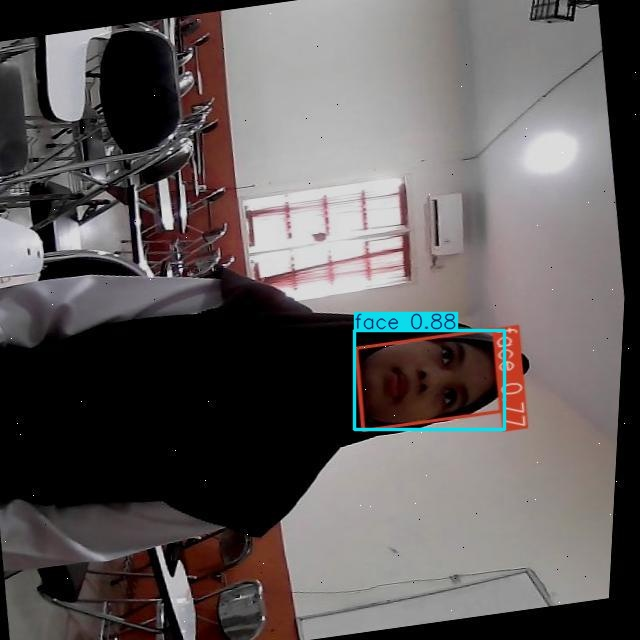

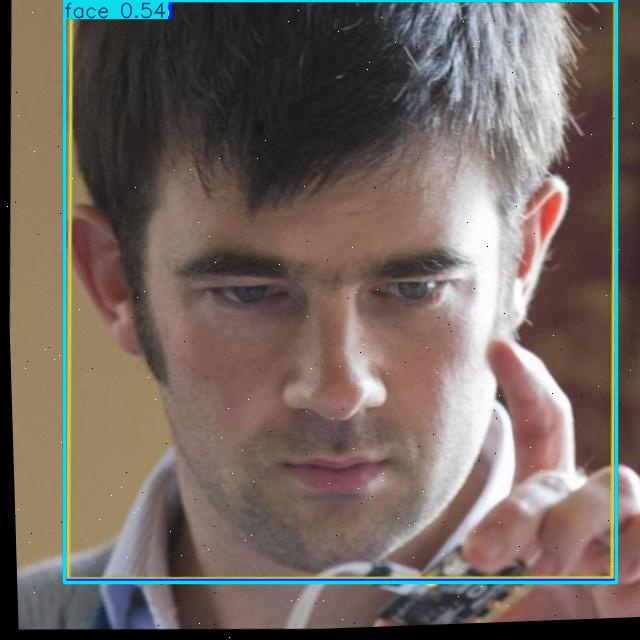

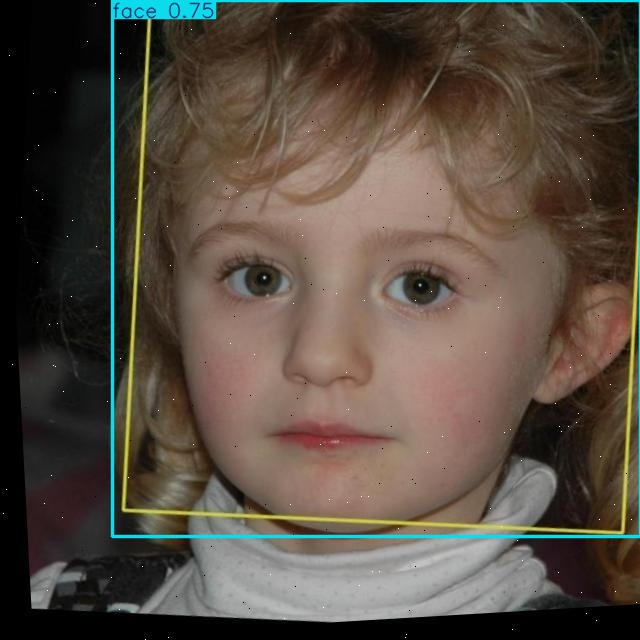

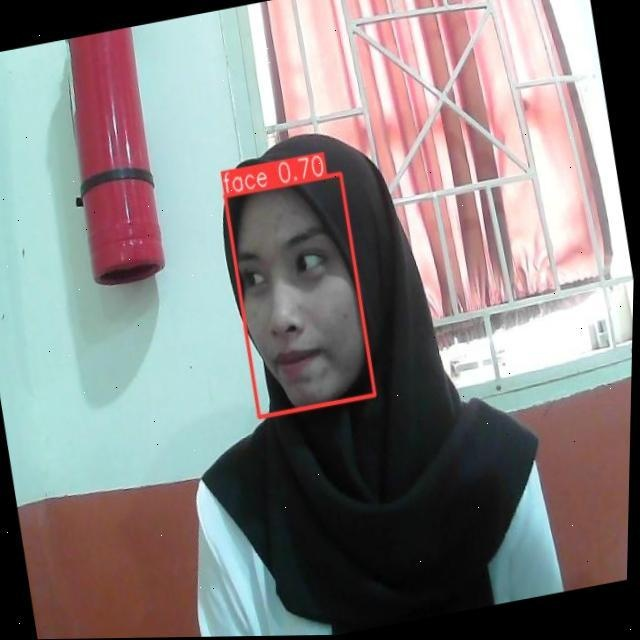

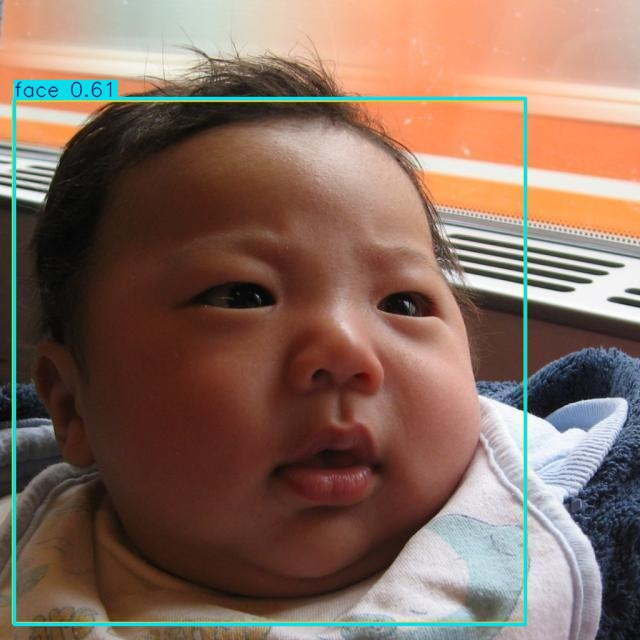

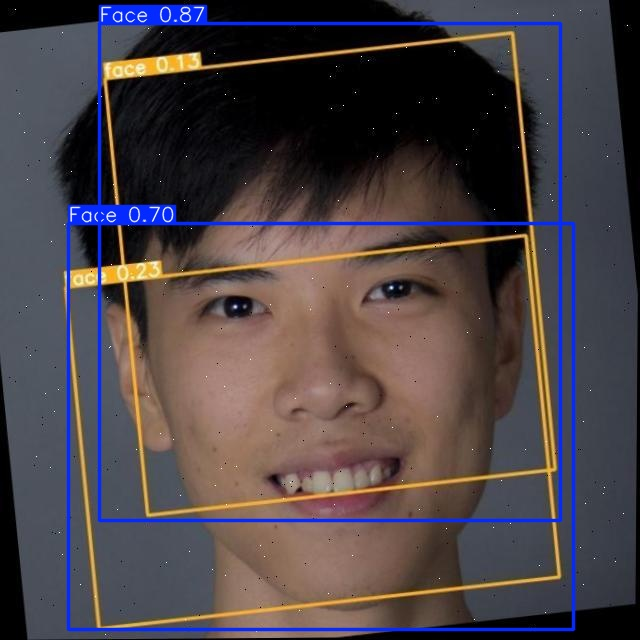

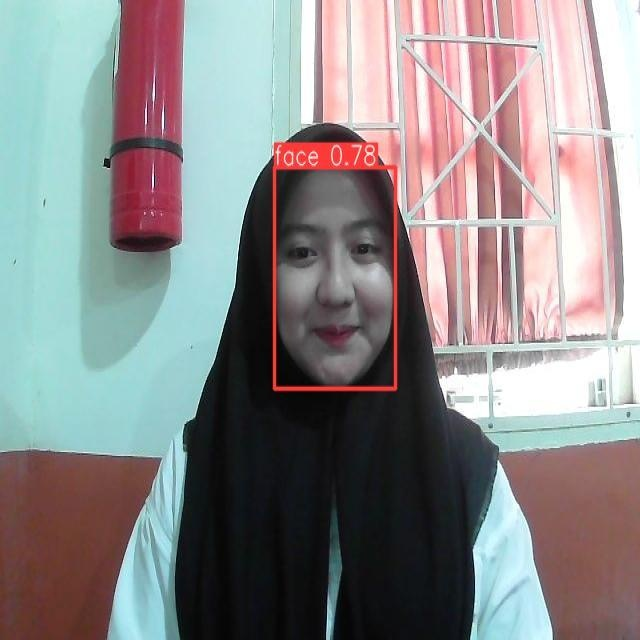

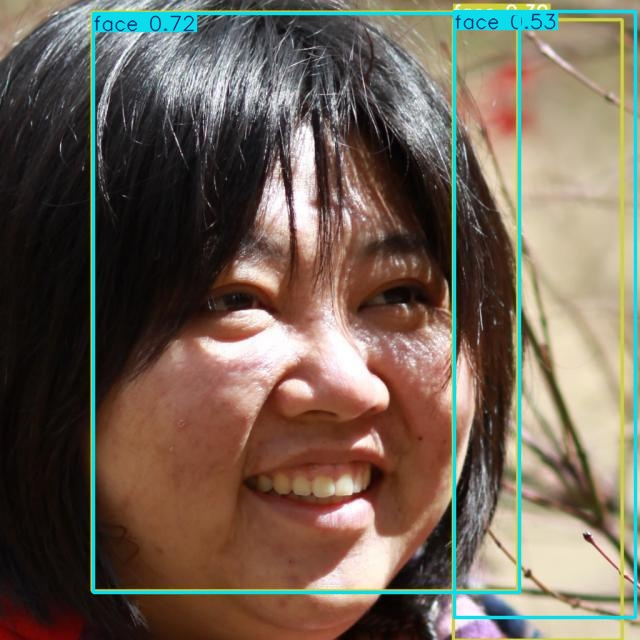

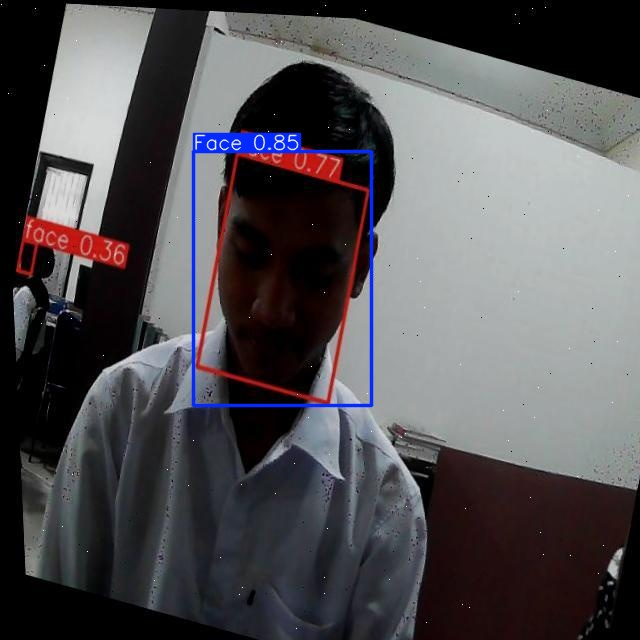

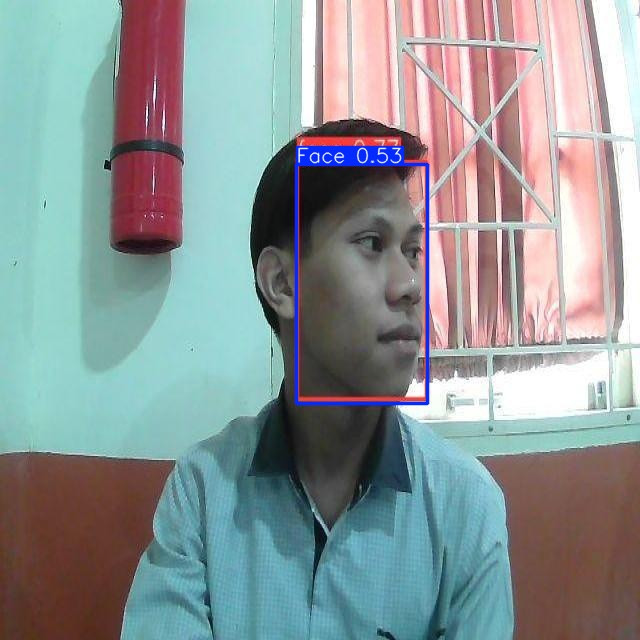

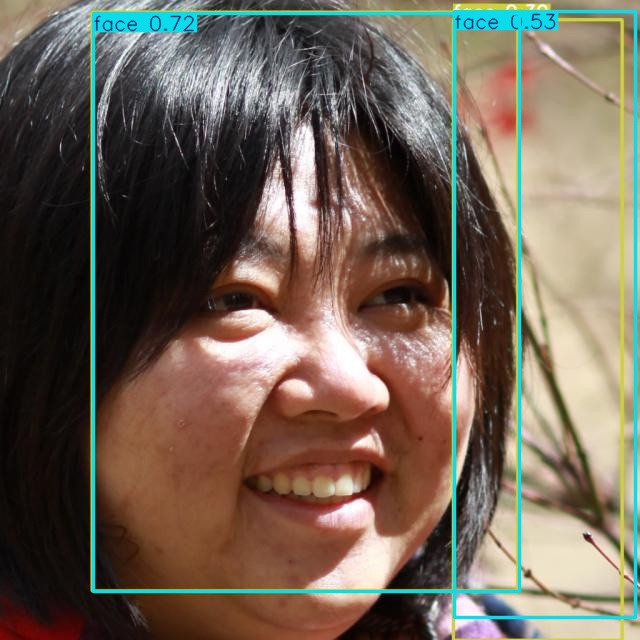

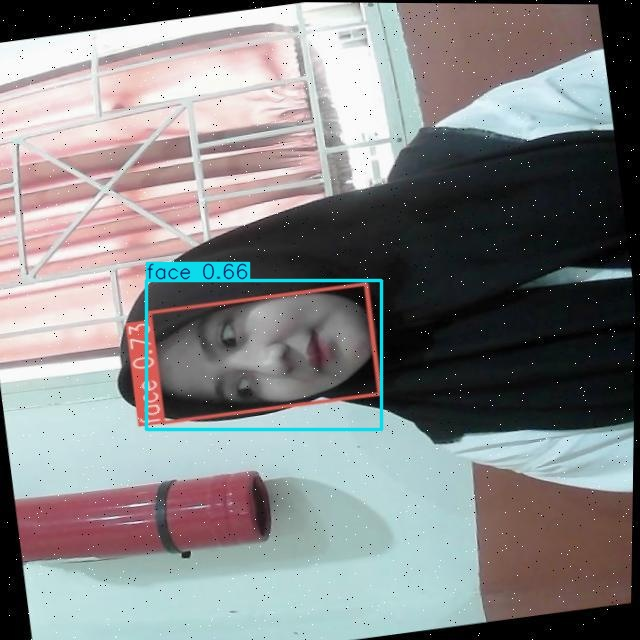

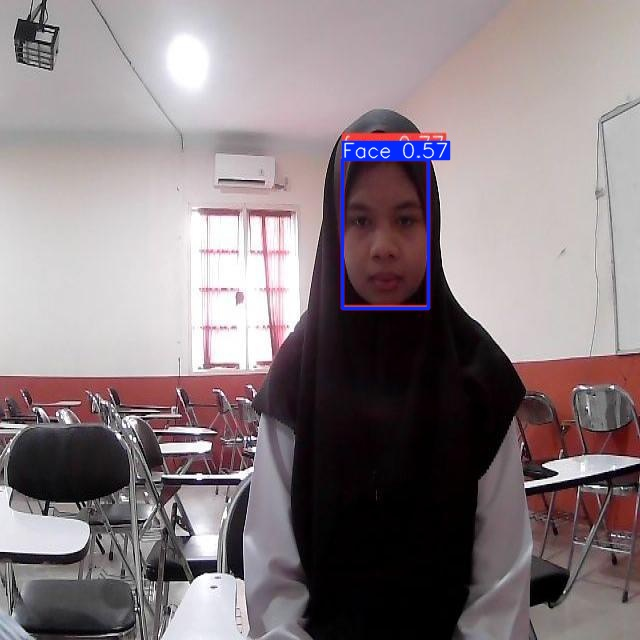

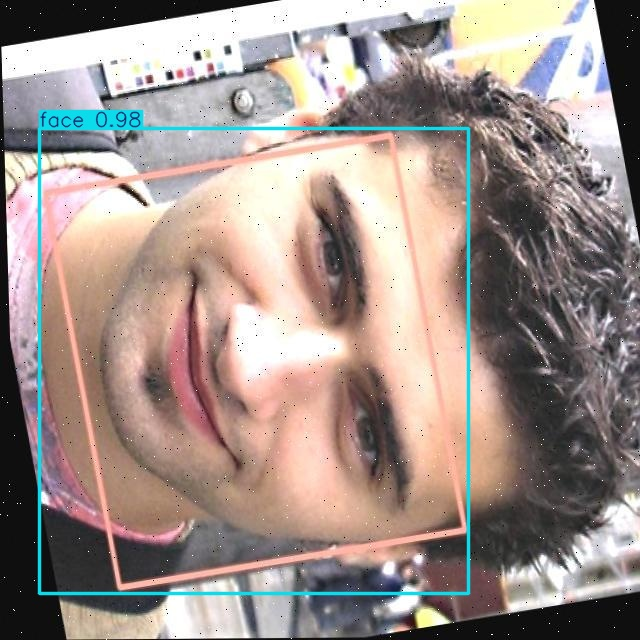

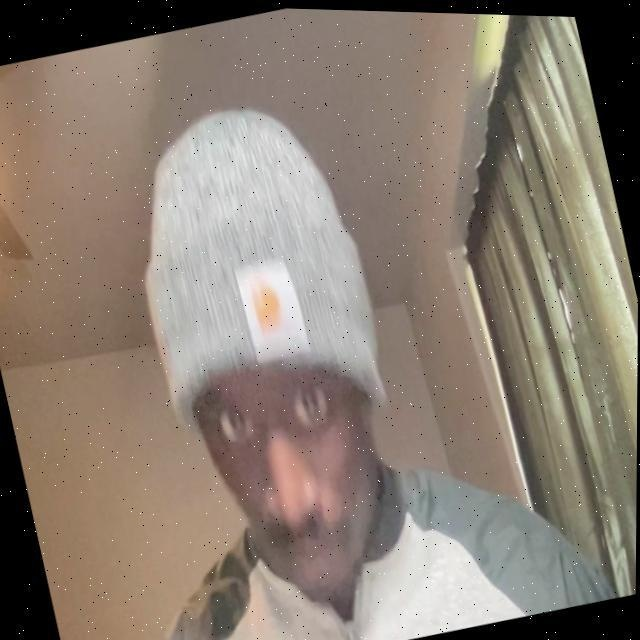

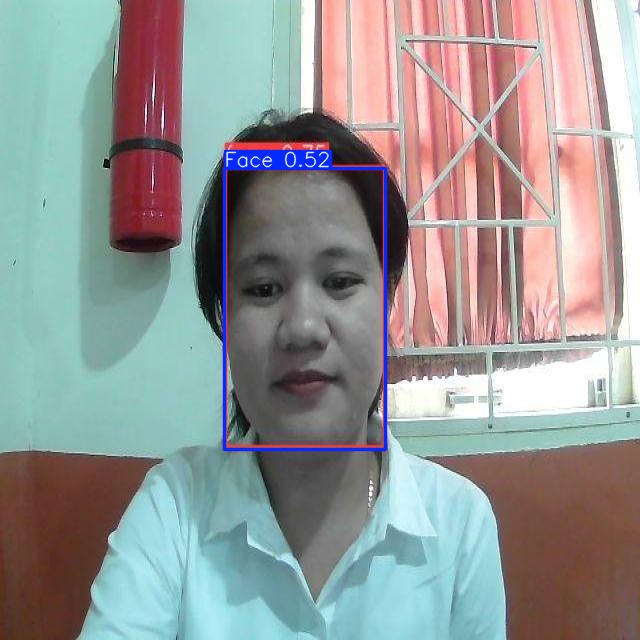

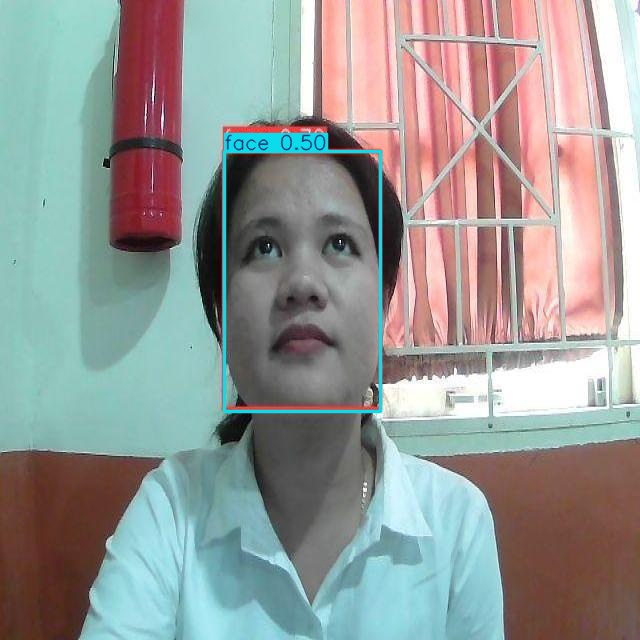

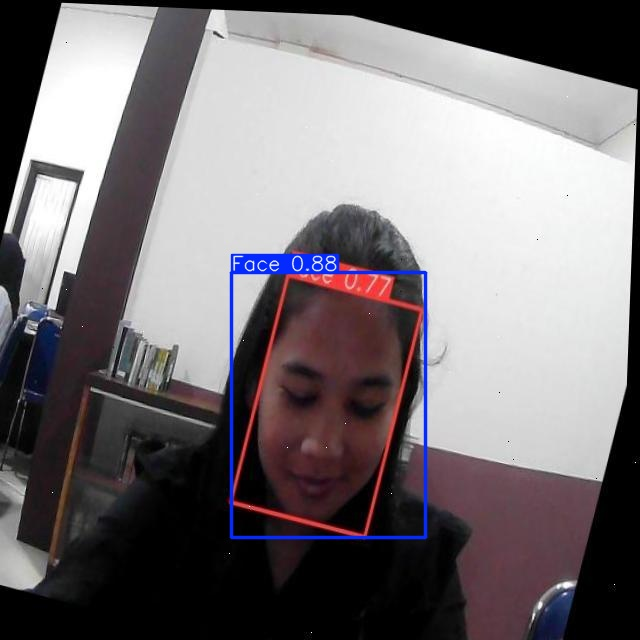

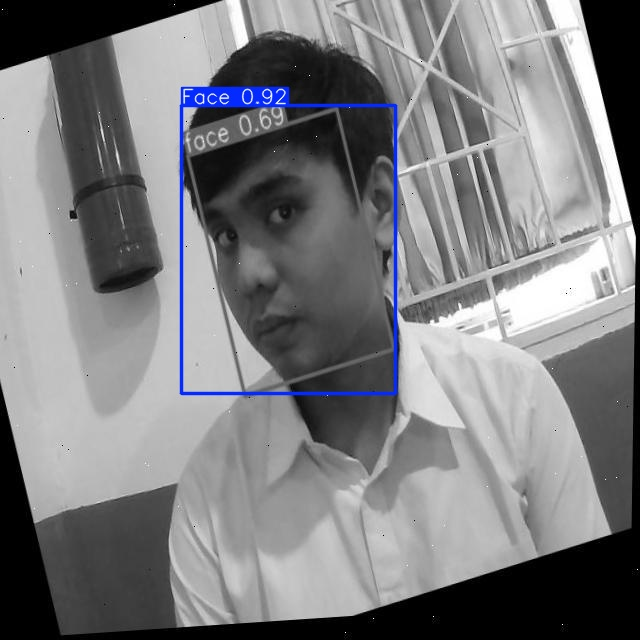

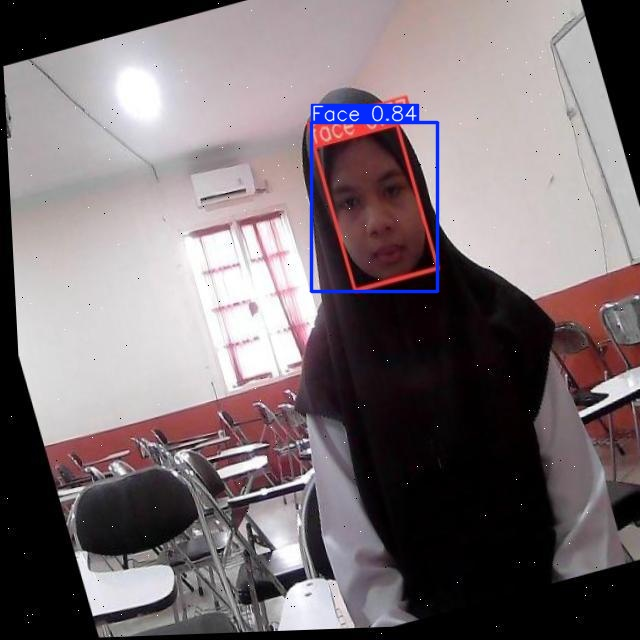

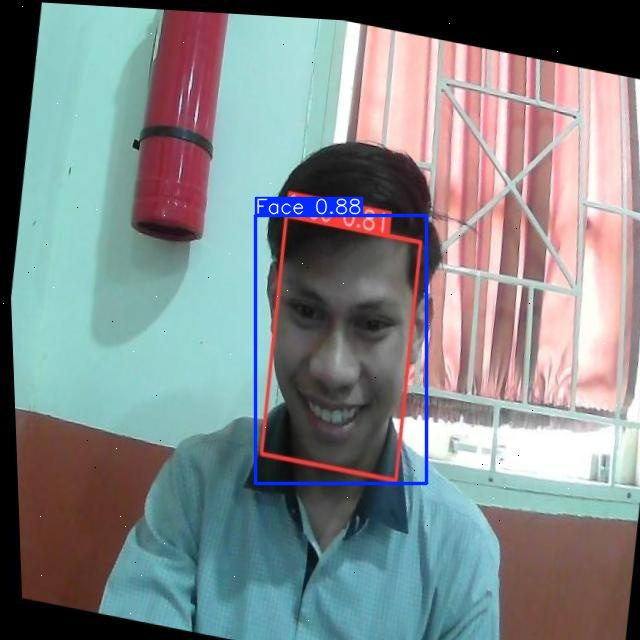

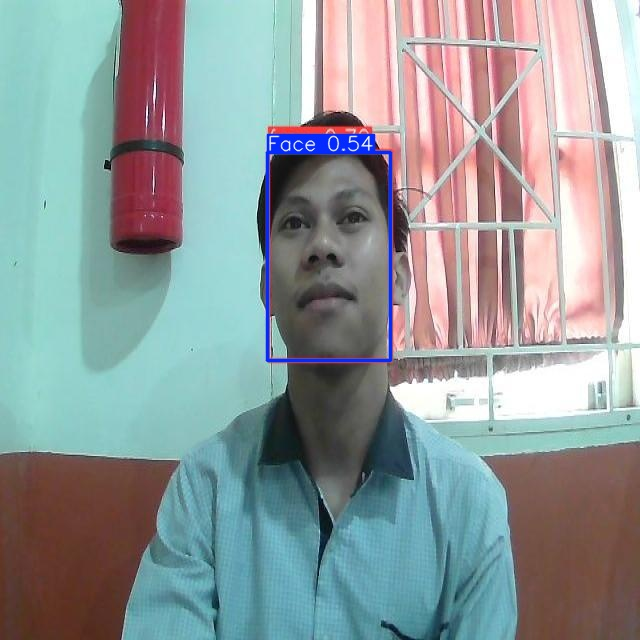

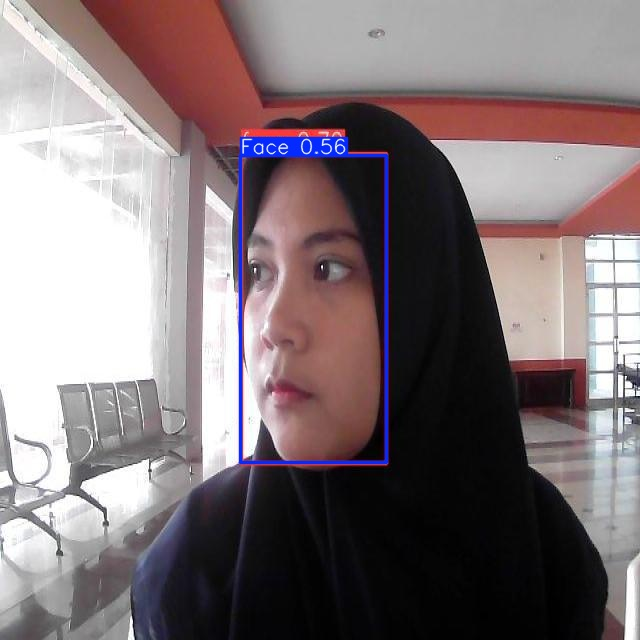

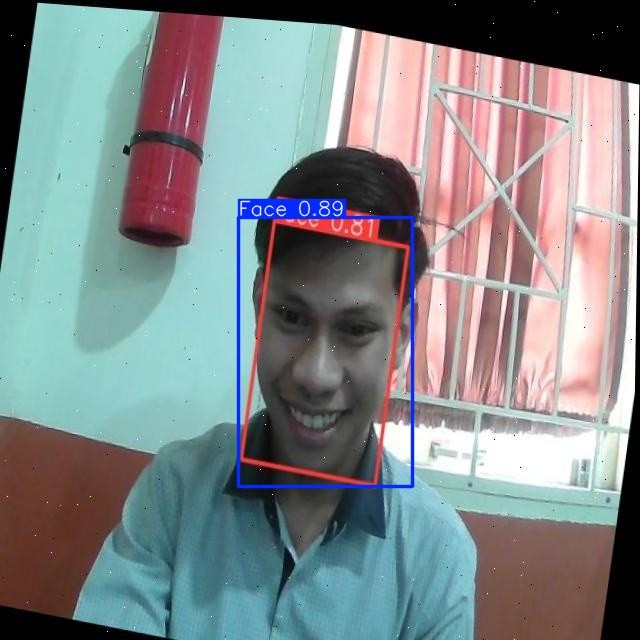

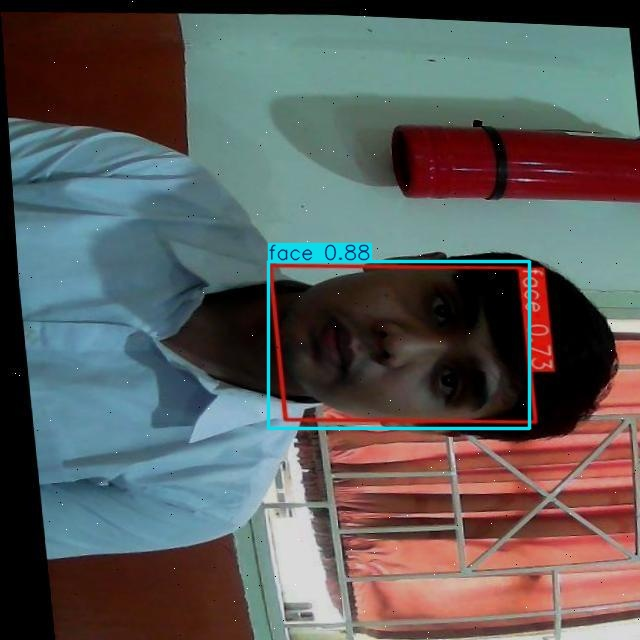

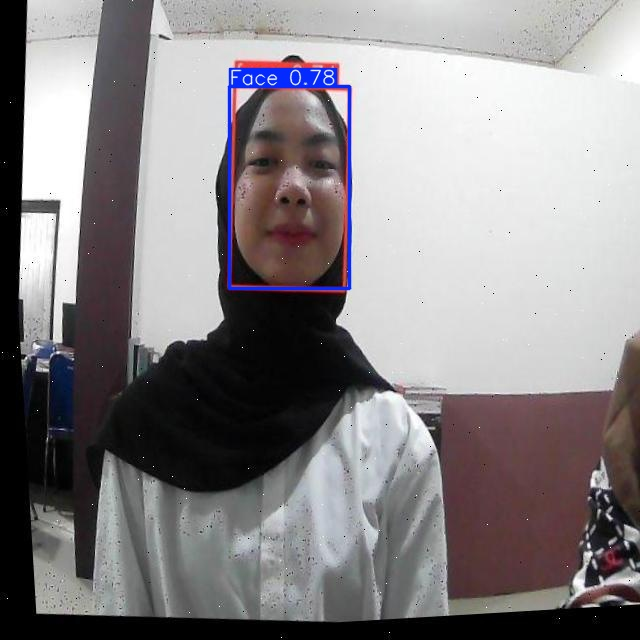

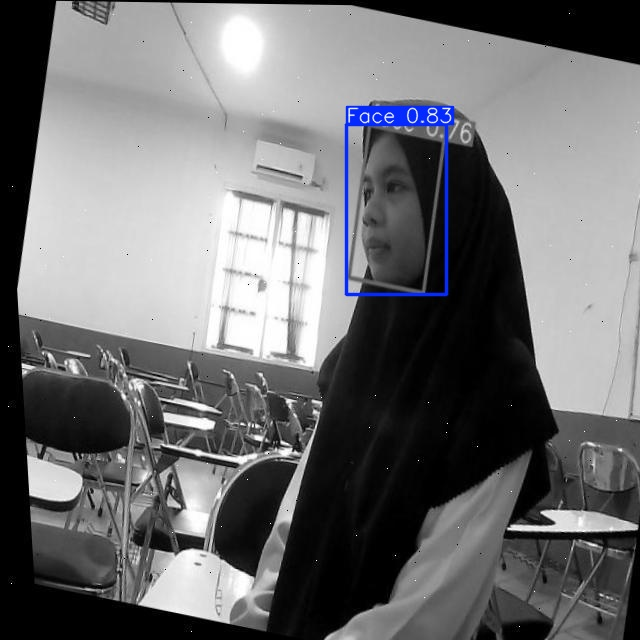

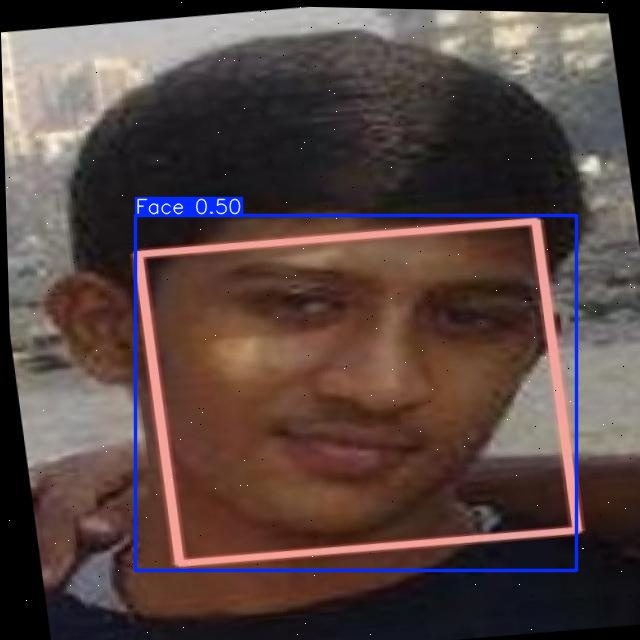

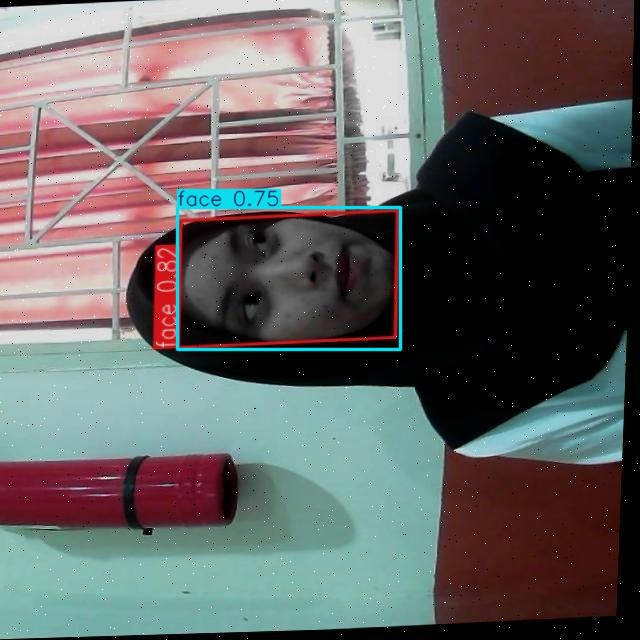

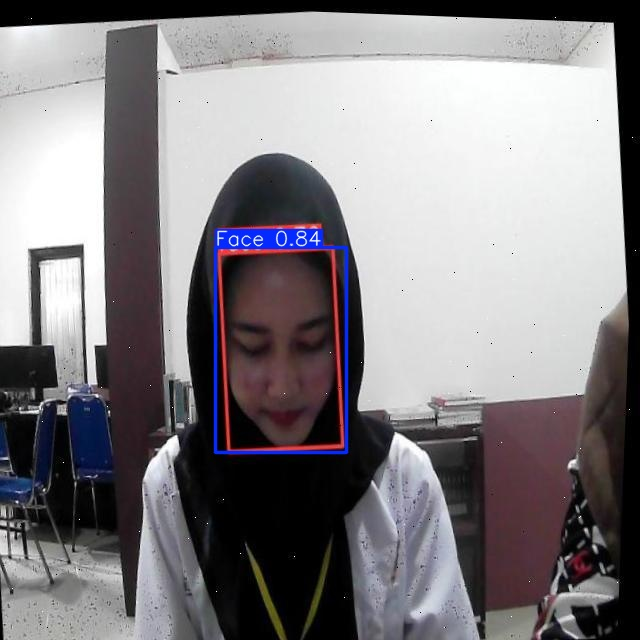

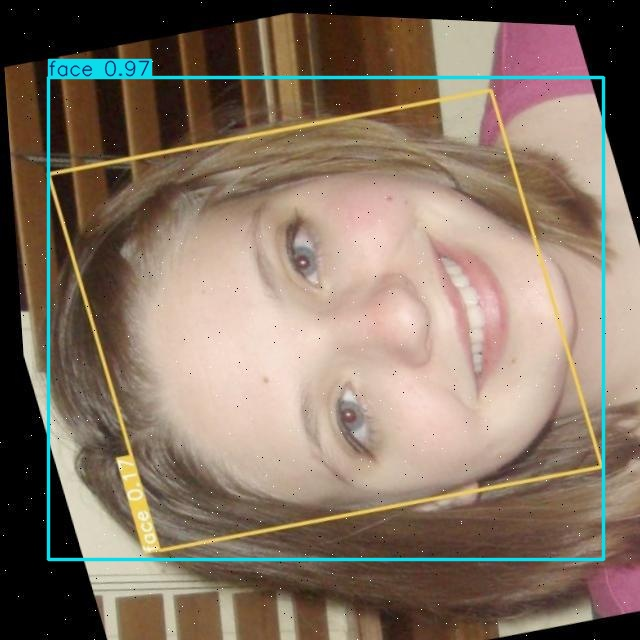

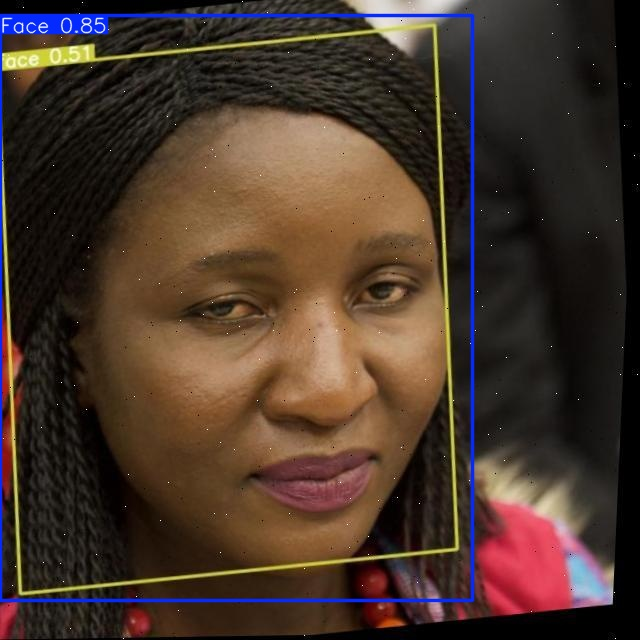

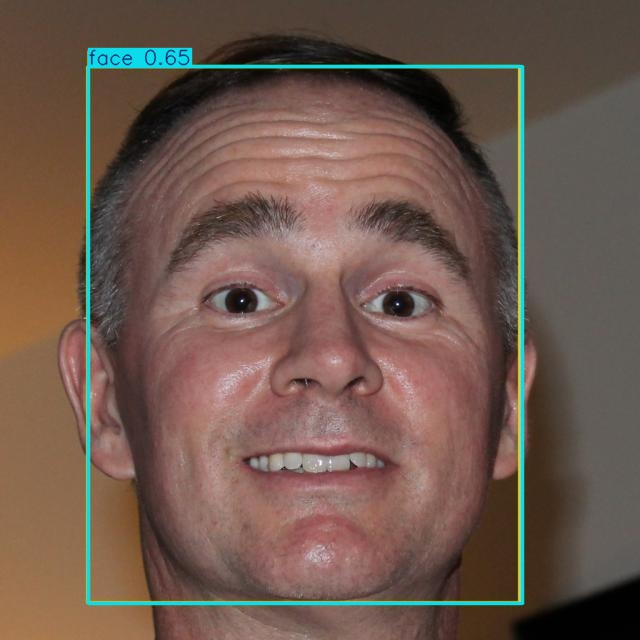

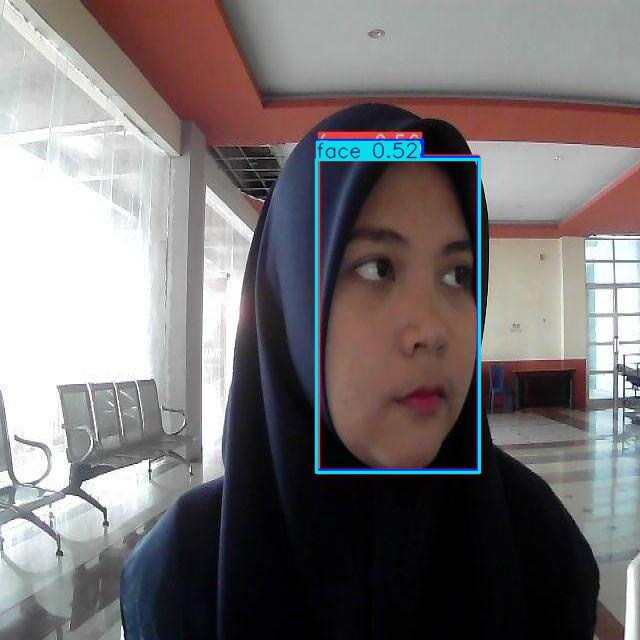

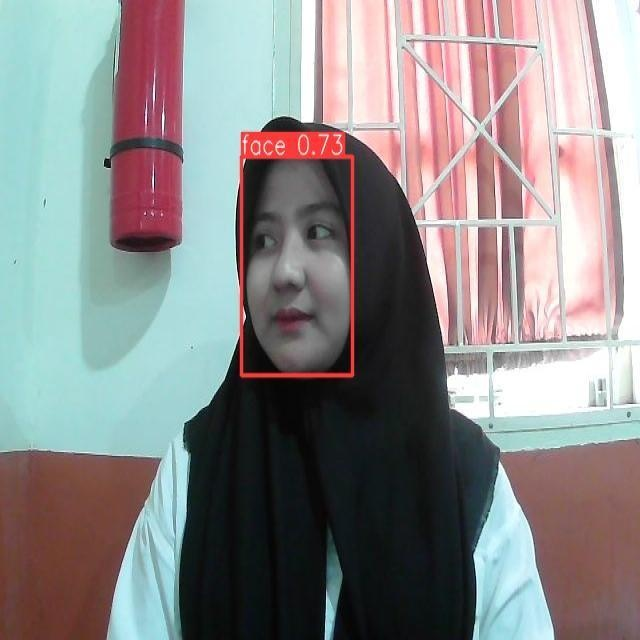

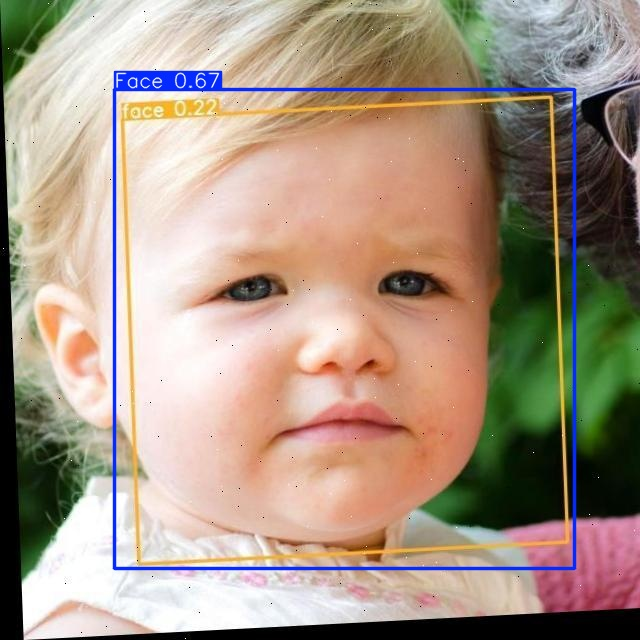

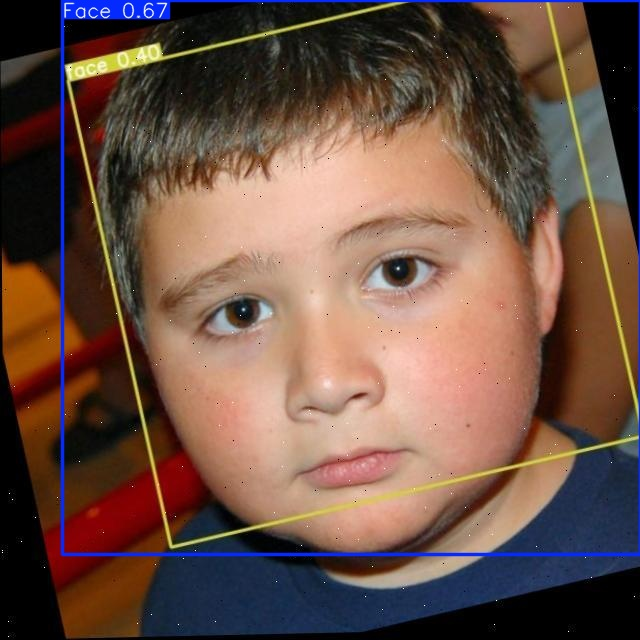

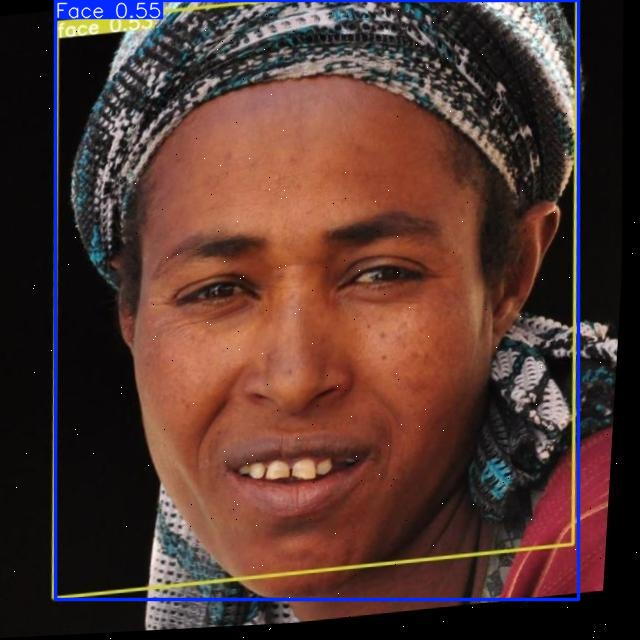

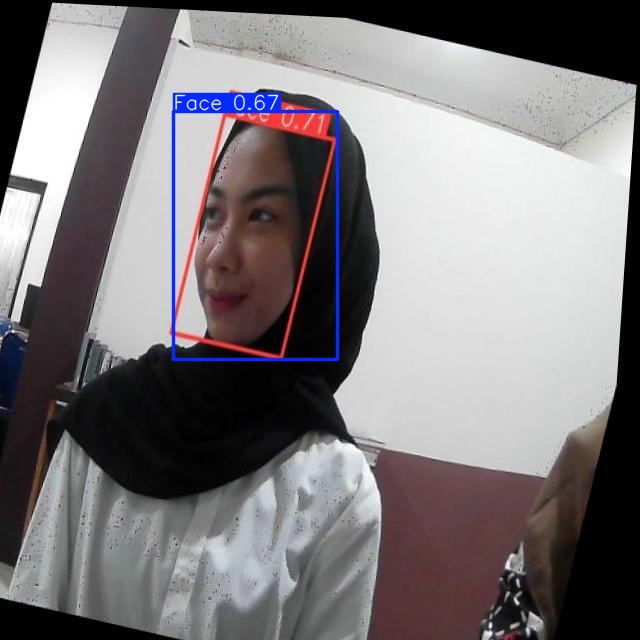

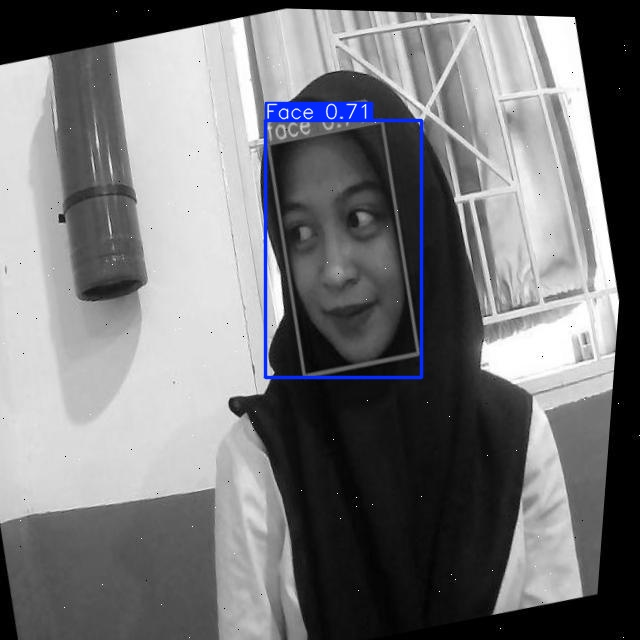

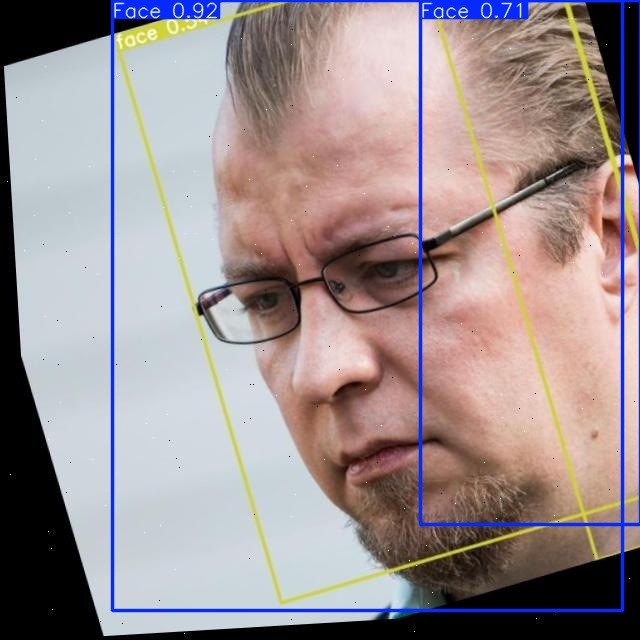

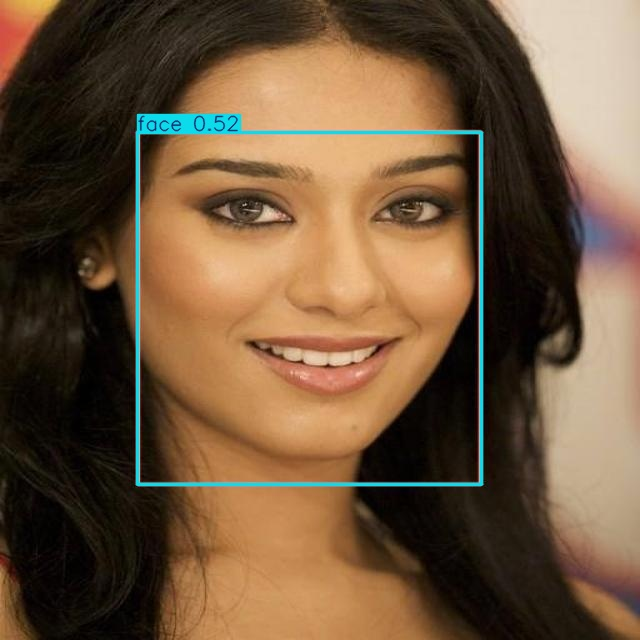

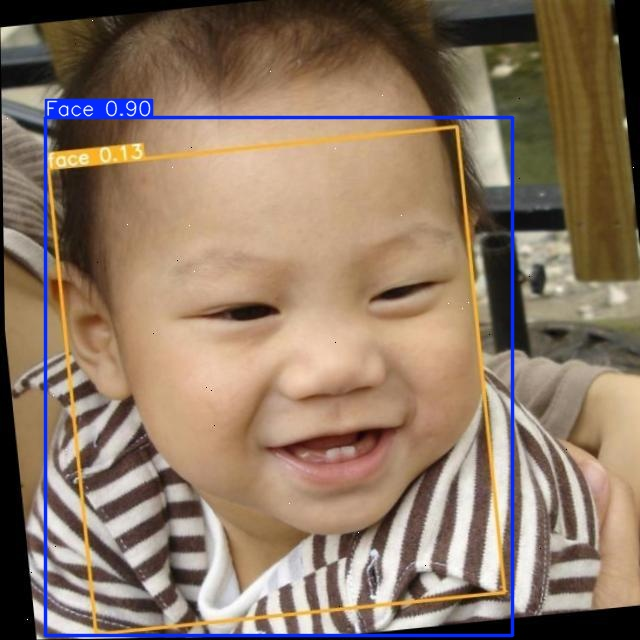

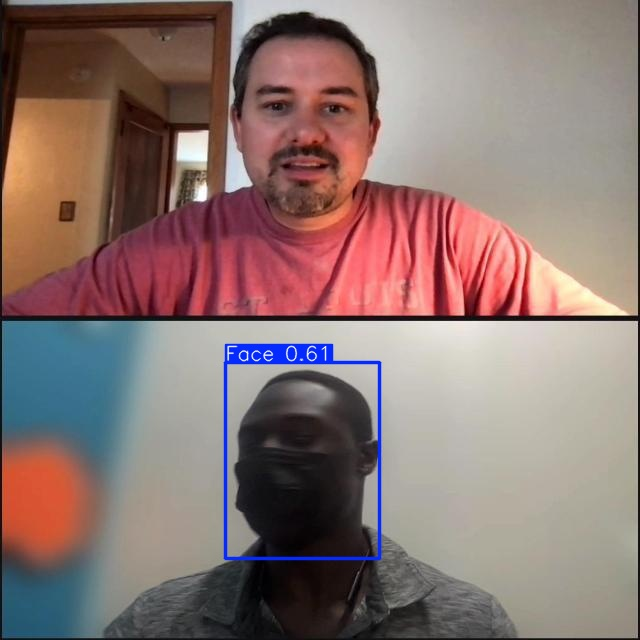

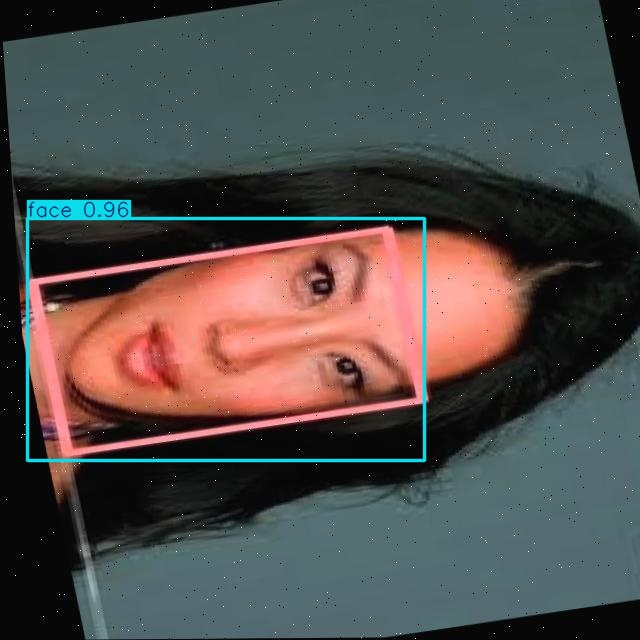

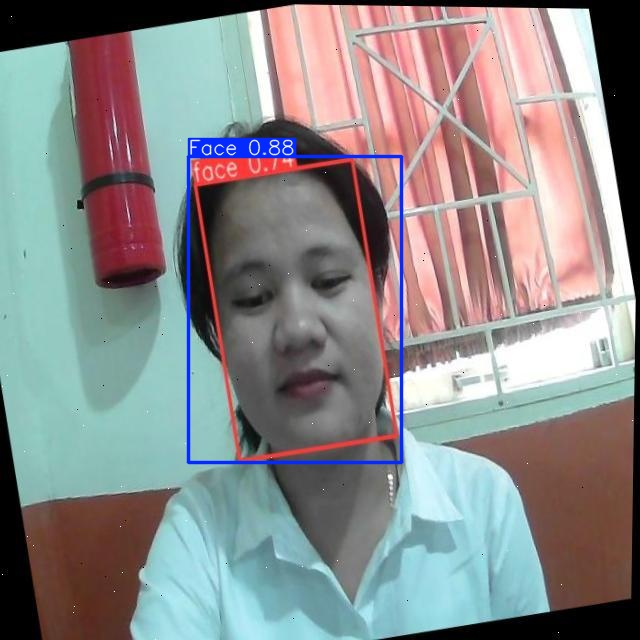

In [13]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("runs/detect/predict/*.jpg"): #assuming JPG
    if i %25 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1